# Task 3 - Evaluation of between-site batch effect removal - top scoring submission per team for Multiome data

Author: Pia Rautenstrauch

Date: 2022-02-10

Computes batchASW on covariates sample and site, and (graph) iLISI on covariates sample and site.

In [1]:
# Imports
import os
import anndata as ad
import numpy as np
import pandas as pd
import scib
import scanpy as sc
import seaborn as sns

In [2]:
# Load metadata of top scoring submission per team and data type - Multiome
meta = pd.read_csv("JE_multiome_output_per_team.csv").sort_values("arithmetic_mean_ATAC", ascending=False)

# Remove submission for which we lack embedding + evaluation; those had a arithmetic_mean_ATAC of 0
# Submission 170579
# Submission 171071
meta.drop([11,2], axis=0, inplace=True)

# set up mapping enabling loading of submissions of respective submissions per team
team_id_mapping = dict(zip(meta["Team Name"], meta["id"]))

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_17267/1909946357.py:49: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_4b81ffes/input.mtx /tmp/4952659.1.all.q/lisi_4b81ffes/
/tmp/4952659.1.all.q/lisi_3_s2d8ee/input.mtx /tmp/4952659.1.all.q/lisi_3_s2d8ee/
/tmp/4952659.1.all.q/lisi_1bl8oe9x/input.mtx /tmp/4952659.1.all.q/lisi_1bl8oe9x/
Amateur: Submission 171079


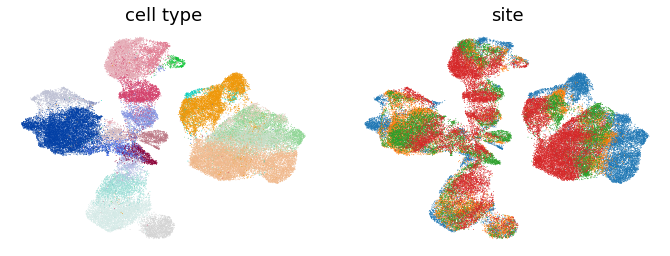

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_17267/1909946357.py:49: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_qoi4gmsm/input.mtx /tmp/4952659.1.all.q/lisi_qoi4gmsm/
/tmp/4952659.1.all.q/lisi_rx4xr6sl/input.mtx /tmp/4952659.1.all.q/lisi_rx4xr6sl/
/tmp/4952659.1.all.q/lisi_uyalqt9y/input.mtx /tmp/4952659.1.all.q/lisi_uyalqt9y/
Living-Systems-Lab: Submission 170825


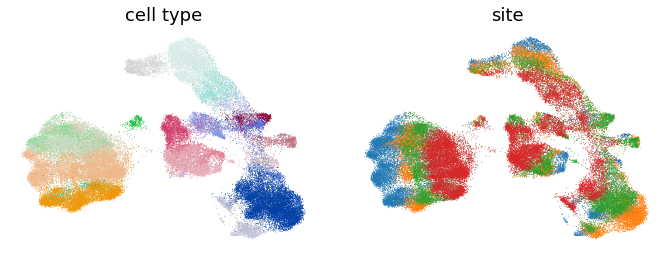

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_17267/1909946357.py:49: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_3716_ikv/input.mtx /tmp/4952659.1.all.q/lisi_3716_ikv/
/tmp/4952659.1.all.q/lisi_g60fheo7/input.mtx /tmp/4952659.1.all.q/lisi_g60fheo7/
/tmp/4952659.1.all.q/lisi_b7tvv0tv/input.mtx /tmp/4952659.1.all.q/lisi_b7tvv0tv/
S_lab: Submission 169995


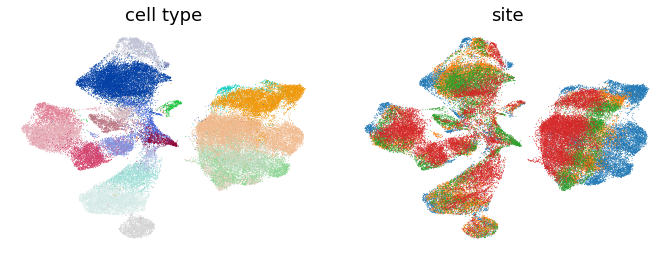

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_17267/1909946357.py:49: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_7ozm337a/input.mtx /tmp/4952659.1.all.q/lisi_7ozm337a/
/tmp/4952659.1.all.q/lisi_civhl_xx/input.mtx /tmp/4952659.1.all.q/lisi_civhl_xx/
/tmp/4952659.1.all.q/lisi_6lz8fg0d/input.mtx /tmp/4952659.1.all.q/lisi_6lz8fg0d/
GLUE: Submission 171078


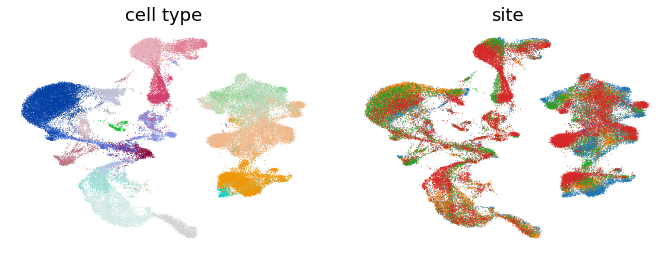

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_17267/1909946357.py:49: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_6lr33rqd/input.mtx /tmp/4952659.1.all.q/lisi_6lr33rqd/
/tmp/4952659.1.all.q/lisi_oacq2pf7/input.mtx /tmp/4952659.1.all.q/lisi_oacq2pf7/
/tmp/4952659.1.all.q/lisi_ec02xufx/input.mtx /tmp/4952659.1.all.q/lisi_ec02xufx/
Guanlab-dengkw: Submission 170435


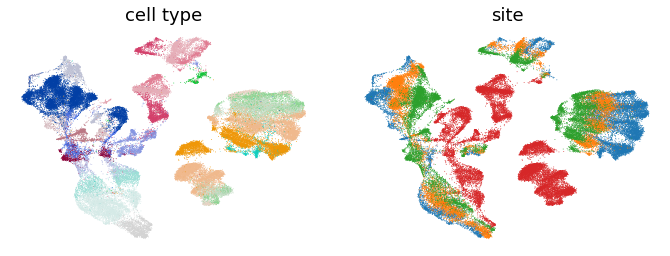

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_17267/1909946357.py:49: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_una3l_om/input.mtx /tmp/4952659.1.all.q/lisi_una3l_om/
/tmp/4952659.1.all.q/lisi_vgqqxqce/input.mtx /tmp/4952659.1.all.q/lisi_vgqqxqce/
/tmp/4952659.1.all.q/lisi_yyxrfhfj/input.mtx /tmp/4952659.1.all.q/lisi_yyxrfhfj/
TeamRegGen: Submission 169908


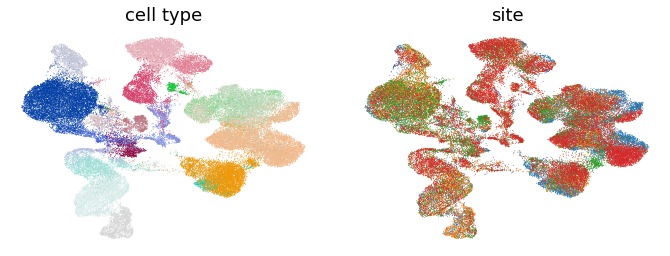

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_17267/1909946357.py:49: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_j0vocnck/input.mtx /tmp/4952659.1.all.q/lisi_j0vocnck/
/tmp/4952659.1.all.q/lisi_69qhds5m/input.mtx /tmp/4952659.1.all.q/lisi_69qhds5m/
/tmp/4952659.1.all.q/lisi_t_5dlu5b/input.mtx /tmp/4952659.1.all.q/lisi_t_5dlu5b/
balia: Submission 170749


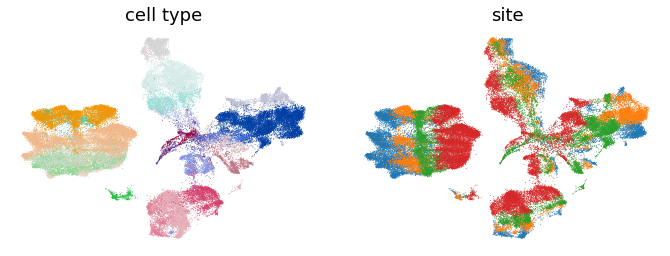

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_17267/1909946357.py:49: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_3d7n9g3t/input.mtx /tmp/4952659.1.all.q/lisi_3d7n9g3t/
/tmp/4952659.1.all.q/lisi_co14263t/input.mtx /tmp/4952659.1.all.q/lisi_co14263t/
/tmp/4952659.1.all.q/lisi_7ebwjoy4/input.mtx /tmp/4952659.1.all.q/lisi_7ebwjoy4/
SIMBA: Submission 171367


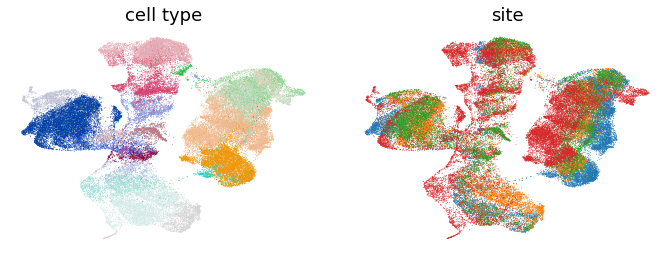

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_17267/1909946357.py:49: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_f8s3aa1a/input.mtx /tmp/4952659.1.all.q/lisi_f8s3aa1a/
/tmp/4952659.1.all.q/lisi_nvkhcb1m/input.mtx /tmp/4952659.1.all.q/lisi_nvkhcb1m/
/tmp/4952659.1.all.q/lisi_p4355ey7/input.mtx /tmp/4952659.1.all.q/lisi_p4355ey7/
GarryLab: Submission 170298


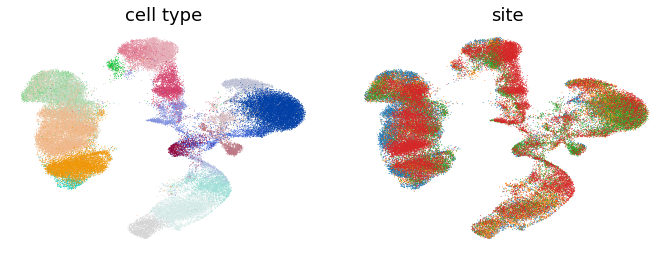

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_17267/1909946357.py:49: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_a2tvgdit/input.mtx /tmp/4952659.1.all.q/lisi_a2tvgdit/
/tmp/4952659.1.all.q/lisi_81zftm72/input.mtx /tmp/4952659.1.all.q/lisi_81zftm72/
/tmp/4952659.1.all.q/lisi_dau1i9x9/input.mtx /tmp/4952659.1.all.q/lisi_dau1i9x9/
LiuZ_Lab_BCM: Submission 170078


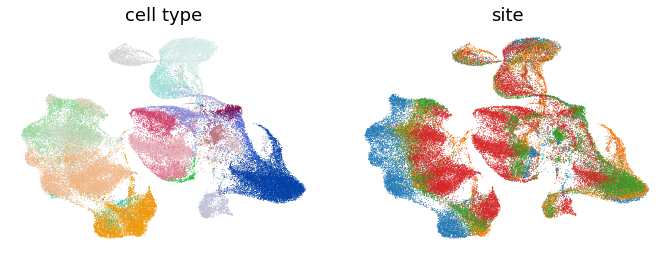

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_17267/1909946357.py:49: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_9txf9416/input.mtx /tmp/4952659.1.all.q/lisi_9txf9416/
/tmp/4952659.1.all.q/lisi_oydzvb5h/input.mtx /tmp/4952659.1.all.q/lisi_oydzvb5h/
/tmp/4952659.1.all.q/lisi_jtfoaxf8/input.mtx /tmp/4952659.1.all.q/lisi_jtfoaxf8/
DJG lab: Submission 169223


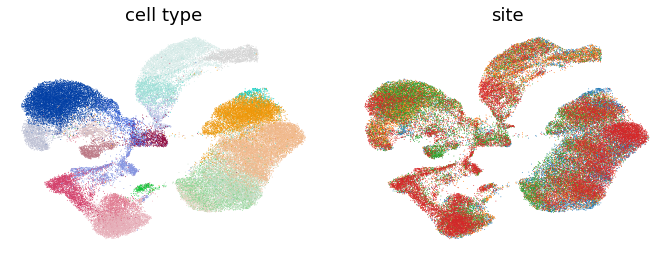

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_17267/1909946357.py:49: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_aapf83dz/input.mtx /tmp/4952659.1.all.q/lisi_aapf83dz/
/tmp/4952659.1.all.q/lisi_u3vjgg5c/input.mtx /tmp/4952659.1.all.q/lisi_u3vjgg5c/
/tmp/4952659.1.all.q/lisi_ugj9vx81/input.mtx /tmp/4952659.1.all.q/lisi_ugj9vx81/
Collab at AskExplain: Submission 170802


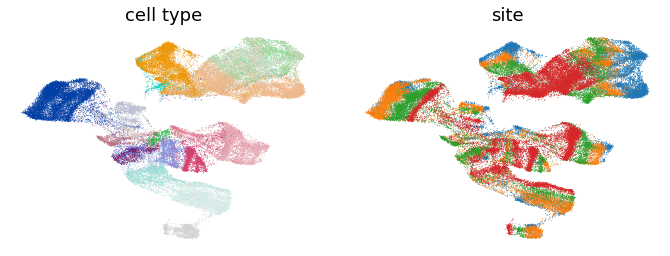

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_17267/1909946357.py:49: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_an73ylfu/input.mtx /tmp/4952659.1.all.q/lisi_an73ylfu/
/tmp/4952659.1.all.q/lisi_ylqwyeb6/input.mtx /tmp/4952659.1.all.q/lisi_ylqwyeb6/
/tmp/4952659.1.all.q/lisi_ja3buv0s/input.mtx /tmp/4952659.1.all.q/lisi_ja3buv0s/
mikephn: Submission 170083


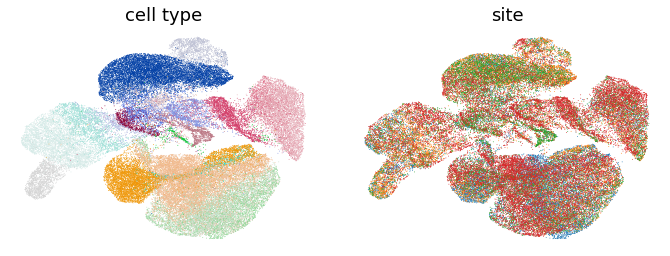

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_17267/1909946357.py:49: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_ndbisuhc/input.mtx /tmp/4952659.1.all.q/lisi_ndbisuhc/
/tmp/4952659.1.all.q/lisi_vm6a2qbn/input.mtx /tmp/4952659.1.all.q/lisi_vm6a2qbn/
/tmp/4952659.1.all.q/lisi_tsy6d0j4/input.mtx /tmp/4952659.1.all.q/lisi_tsy6d0j4/
Transbio_NB: Submission 169876


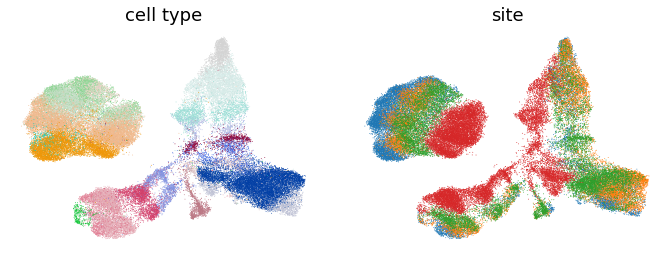

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_17267/1909946357.py:49: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_0j6niu2i/input.mtx /tmp/4952659.1.all.q/lisi_0j6niu2i/
/tmp/4952659.1.all.q/lisi_0je711yj/input.mtx /tmp/4952659.1.all.q/lisi_0je711yj/
/tmp/4952659.1.all.q/lisi_a6ojd9ji/input.mtx /tmp/4952659.1.all.q/lisi_a6ojd9ji/
ob1a: Submission 170288


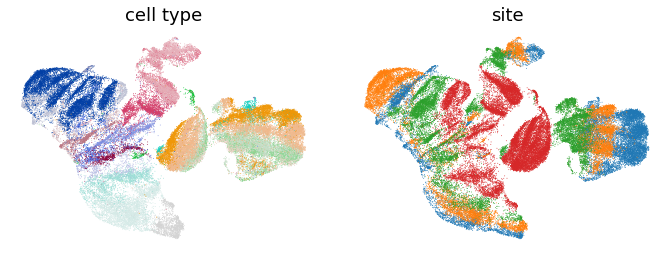

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_17267/1909946357.py:49: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_rfky8cjk/input.mtx /tmp/4952659.1.all.q/lisi_rfky8cjk/
/tmp/4952659.1.all.q/lisi_xzfne2h2/input.mtx /tmp/4952659.1.all.q/lisi_xzfne2h2/
/tmp/4952659.1.all.q/lisi_7rdaucn9/input.mtx /tmp/4952659.1.all.q/lisi_7rdaucn9/
Teddy: Submission 170704


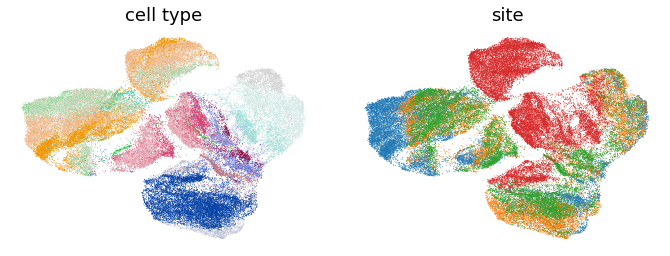

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_17267/1909946357.py:49: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',
Variable names are not unique. To 

/tmp/4952659.1.all.q/lisi_vp5zvqa8/input.mtx /tmp/4952659.1.all.q/lisi_vp5zvqa8/


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


/tmp/4952659.1.all.q/lisi_0gxhh3os/input.mtx /tmp/4952659.1.all.q/lisi_0gxhh3os/


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


/tmp/4952659.1.all.q/lisi_wqslc59u/input.mtx /tmp/4952659.1.all.q/lisi_wqslc59u/
MahfouzLab: Submission 170640


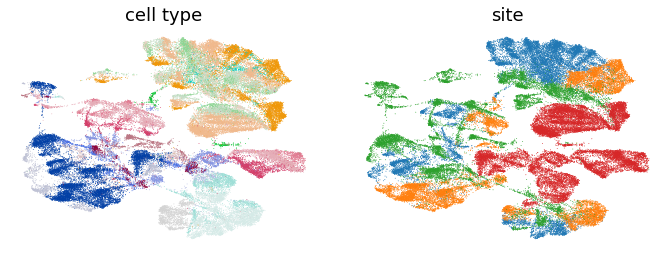

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_17267/1909946357.py:49: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_7vw5tnq6/input.mtx /tmp/4952659.1.all.q/lisi_7vw5tnq6/
/tmp/4952659.1.all.q/lisi_ze7qzg6o/input.mtx /tmp/4952659.1.all.q/lisi_ze7qzg6o/
/tmp/4952659.1.all.q/lisi_oum9sgjs/input.mtx /tmp/4952659.1.all.q/lisi_oum9sgjs/
teamupupup: Submission 170423


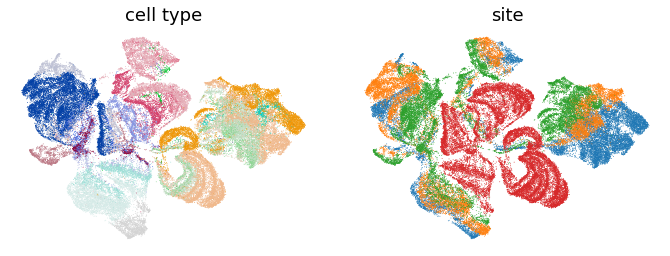

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_17267/1909946357.py:49: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_pupn0eeg/input.mtx /tmp/4952659.1.all.q/lisi_pupn0eeg/
/tmp/4952659.1.all.q/lisi_xnwm4v7k/input.mtx /tmp/4952659.1.all.q/lisi_xnwm4v7k/
/tmp/4952659.1.all.q/lisi_1z4c0qh3/input.mtx /tmp/4952659.1.all.q/lisi_1z4c0qh3/
willM: Submission 170329


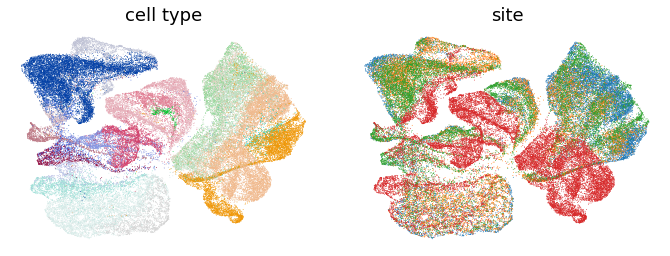

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_17267/1909946357.py:49: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_46pqktno/input.mtx /tmp/4952659.1.all.q/lisi_46pqktno/
/tmp/4952659.1.all.q/lisi_1l77k79b/input.mtx /tmp/4952659.1.all.q/lisi_1l77k79b/
/tmp/4952659.1.all.q/lisi_c3yb7ylp/input.mtx /tmp/4952659.1.all.q/lisi_c3yb7ylp/
Maxwell: Submission 168647


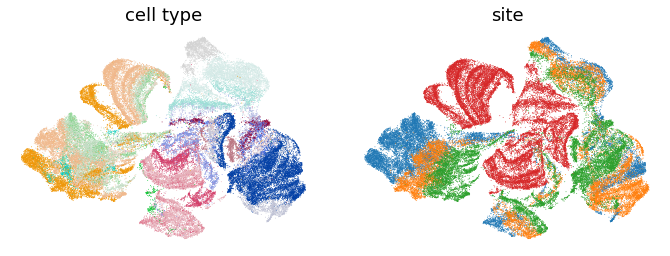

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_17267/1909946357.py:49: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_mxguayc7/input.mtx /tmp/4952659.1.all.q/lisi_mxguayc7/
/tmp/4952659.1.all.q/lisi_ks2e22f4/input.mtx /tmp/4952659.1.all.q/lisi_ks2e22f4/
/tmp/4952659.1.all.q/lisi_2n2kji5r/input.mtx /tmp/4952659.1.all.q/lisi_2n2kji5r/
FinPak: Submission 168524


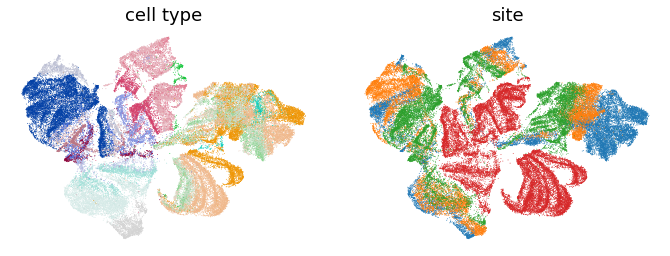

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_17267/1909946357.py:49: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_t_m0m4zb/input.mtx /tmp/4952659.1.all.q/lisi_t_m0m4zb/
/tmp/4952659.1.all.q/lisi_ljr4x1xk/input.mtx /tmp/4952659.1.all.q/lisi_ljr4x1xk/
/tmp/4952659.1.all.q/lisi_bsdjncxp/input.mtx /tmp/4952659.1.all.q/lisi_bsdjncxp/
GALIXIR_SYSU: Submission 168849


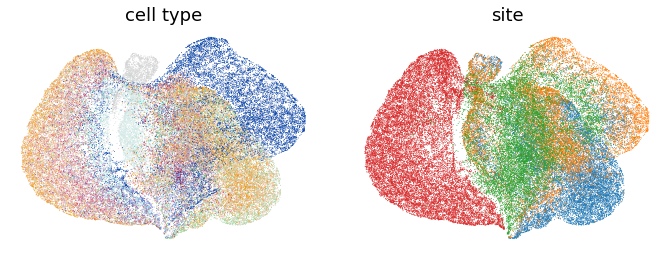

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_17267/1909946357.py:49: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_okbxvt2f/input.mtx /tmp/4952659.1.all.q/lisi_okbxvt2f/
/tmp/4952659.1.all.q/lisi_qdj9wmcm/input.mtx /tmp/4952659.1.all.q/lisi_qdj9wmcm/
/tmp/4952659.1.all.q/lisi_vdc3xvr0/input.mtx /tmp/4952659.1.all.q/lisi_vdc3xvr0/
BIMSB Bioinformatics: Submission 168939


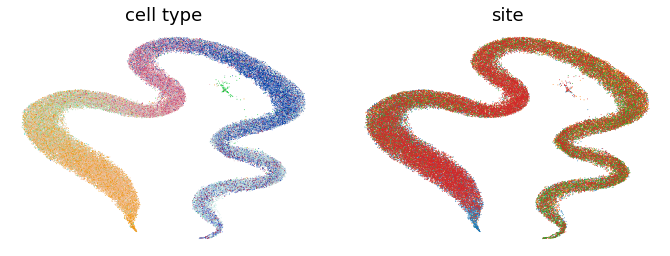

/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/prauten/miniconda3/envs/scib_min/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/tmp/4952659.1.all.q/ipykernel_17267/1909946357.py:49: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog',


/tmp/4952659.1.all.q/lisi_dc1khnoi/input.mtx /tmp/4952659.1.all.q/lisi_dc1khnoi/
/tmp/4952659.1.all.q/lisi_cyvwcp8x/input.mtx /tmp/4952659.1.all.q/lisi_cyvwcp8x/
/tmp/4952659.1.all.q/lisi_735vu91u/input.mtx /tmp/4952659.1.all.q/lisi_735vu91u/
ComManDo: Submission 171086


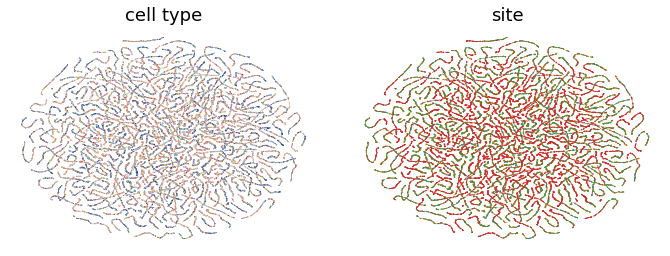

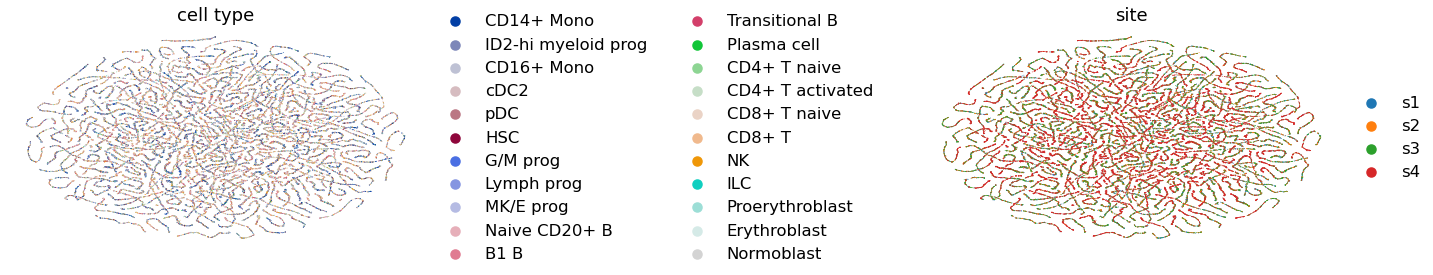

In [3]:
np.random.seed(61)

# Collect computed scores, nested dict is simple to convert to pd.DataFrame
score_dict = {}
for team, id in team_id_mapping.items():
    # Initialize nested dict
    score_dict[team] = {}
    
    # Read embeddings
    # If available use embedding used for method ranking in the challenge (some methods can result in variable outputs, and no use of random seeds was enforced)
    try:
        embedding = ad.read_h5ad("./embeddings/submission_{}/output/predictions/joint_embedding/openproblems_bmmc_multiome_phase2/openproblems_bmmc_multiome_phase2.method.output.h5ad".format(id))
        score_dict[team]['recomputed'] = False
    # If the embedding from the evaluation was not stored, fall back to the recomputed embedding after the challenge finished, this can deviate from the scores in the leaderboard
    except:
        embedding = ad.read_h5ad("./recomputed_embeddings/submission_{}/output_new/predictions/joint_embedding/openproblems_bmmc_multiome_phase2/openproblems_bmmc_multiome_phase2.method.output.h5ad".format(id))
        score_dict[team]['recomputed'] = True

    # How many dimensions does embedding have
    score_dict[team]['dims'] = embedding.X.shape[1]
    
    
    # Compute neighbors 
    embedding.obsm['X_emb'] = embedding.X.copy()

    sc.pp.neighbors(embedding, use_rep='X_emb')
    sc.tl.umap(embedding)
    
    # Load metadata (cell type information)
    solution = ad.read_h5ad("./solution/openproblems_bmmc_multiome_phase2.censor_dataset.output_solution.h5ad")
    
    # Make sure order is the same as for the embedding
    solution = solution[embedding.obs.index,:].copy()
    
    # Transfer batch information and cell type labels to embedding
    embedding.obs['batch'] = solution.obs['batch']
    embedding.obs["cell_type"] = solution.obs['cell_type']
    
    ### Rename cell_type
    embedding.obs.rename({'cell_type': 'cell type'}, axis=1, inplace=True)
    
    
    
    # Unify color scheme across figures for publication
    # make sure cell type it's categorical
    embedding.obs['cell type'] = embedding.obs['cell type'].astype('category')

    # order them
    embedding.obs['cell type'].cat.reorder_categories(['CD14+ Mono', 'ID2-hi myeloid prog', 'CD16+ Mono', 'cDC2', 'pDC', 'HSC', 'G/M prog', 'Lymph prog', 
                                                  'MK/E prog', 'Naive CD20+ B', 'B1 B', 'Transitional B', 'Plasma cell', 'CD4+ T naive', 'CD4+ T activated', 
                                                  'CD8+ T naive', 'CD8+ T', 'NK', 'ILC', 'Proerythroblast', 'Erythroblast','Normoblast'], inplace=True)

    # Pick colors and put into uns
    cols = ['#023fa5', '#7d87b9', '#bec1d4', '#d6bcc0', '#bb7784',
        '#8e063b', '#4a6fe3', '#8595e1', '#b5bbe3', '#e6afb9',
        '#e07b91', '#d33f6a', '#11c638', '#8dd593', '#c6dec7',
        '#ead3c6', '#f0b98d', '#ef9708', '#0fcfc0', '#9cded6',
        '#d5eae7', '#d3d3d3']
    
    
    embedding.uns['cell type_colors'] = cols
    
    
    # Compute scores
    ## Level of evaluation: batch/sample
    ### graph iLISI and cLISI on variable batch
    score_dict[team]['iLISI_batch'], score_dict[team]['cLISI_full'] =  scib.me.lisi.lisi_graph(embedding, batch_key='batch', label_key='cell type', multiprocessing=True)
    
    ### asw_batch
    score = scib.me.silhouette_batch(
        embedding,
        batch_key='batch',
        group_key='cell type',
        embed='X_emb',
        verbose=False
    )

    score_dict[team]['asw_batch'] = score
      
    ## Level of evaluation: site
    embedding.obs['site'] = embedding.obs['batch'].apply(lambda x: x.split('d')[0]).astype("category")

    ### graph iLISI and cLISI on variable site (stratify batches by site)
    score_dict[team]['iLISI_site'] =  scib.me.lisi.ilisi_graph(embedding, batch_key='site', multiprocessing=True)

    ### asw_site
    score_site = scib.me.silhouette_batch(
        embedding,
        batch_key='site',
        group_key='cell type',
        embed='X_emb',
        verbose=False
    )

    score_dict[team]['asw_batch_site'] = score_site

    ### Save UMAP visualization as png for PMLR report figure
    print('{}: Submission {}'.format(team, id))
    sc.pl.umap(
        embedding,
        color=['cell type', 'site'],
        size=3,
        frameon=False,
        ncols=2,
        legend_loc=None,
        wspace=0.0,
        save="_{}_submission_{}_multiome.png".format(team, id)
    )
    
    pd.DataFrame(score_dict).to_csv("batch_removal_scores_{}_submission_{}.csv".format(team, id), index=True)

# Store legend once for figures   
sc.pl.umap(
    embedding,
    color=['cell type', 'site'],
    size=3,
    frameon=False,
    ncols=2,
    wspace=1,
    save="_{}_submission_{}_multiome_legend.png".format(team, id)
    )

In [4]:
pd.DataFrame(score_dict).to_csv("novel_batch_removal_scores_all_submissions.csv", index=True)